In [1]:
%load_ext load_style
%load_style talk.css

# Apply Hovmoller Diagram-The seasonal migration of rainfall in Africa

A Hovmöller diagram is a commonly used way of plotting meteorological data to highlight the role of waves. The axes of a Hovmöller diagram are typically longitude or latitude (abscissa or x-axis) and time (ordinate or y-axis) with the value of some field represented through color or shading. Hovmöller diagrams are also used to plot the time evolution of vertical profiles of scalar quantities such as temperature, density, or concentrations of constituents in the atmosphere or ocean. In that case time is plotted along the abscissa and vertical position (depth, height, pressure) along the ordinate.

The diagram was invented by Ernest Aabo Hovmöller (1912-2008), a Danish meteorologist, in a paper of 1949.

From wiki at https://en.wikipedia.org/wiki/Hovm%C3%B6ller_diagram. Moreover, this part is inpired by the [nice blog](https://www.climate.gov/news-features/understanding-climate/hovm%C3%B6ller-diagram-climate-scientist%E2%80%99s-best-friend) written by Tom Di Liberto.

## 1. Rainfall in Africa

The seasonal migration of rainfall in Africa is one of the major rhythms of Earth’s climate system. Rains are generally dominated by the location of the Intertropical Convergence Zone (ITCZ), where the trade winds in each hemisphere meet. Millions of people rely on the timely seasonal progression of the rains in order to plant crops and feed their families. The seasonal migration of the rains across the continent lead to distinct rainfall seasons in West Africa, Eastern Africa, and Southern Africa. 

## 2. Data source

Several datasets are publicly available. Here the CHIRPS daily precipitation data is downloaded as an example, which consists of two spatial resolutions of 0.5 and 2.5. In this part, the data of 2.5 degree is used to create the Hovmöller Diagram across the ITCZ in Africa.

ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CHIRPS-2.0/global_daily/netcdf/

## 3. Create Hovmöller Diagram of  seasonal migration of rainfall in Africa

### 3.1 Load basic libraries

In [2]:
% matplotlib inline

import datetime as dt
import numpy as np
from netCDF4 import Dataset  # http://unidata.github.io/netcdf4-python/

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import matplotlib.ticker as ticker

### 3.2 Read daily rainfall data in 2016

* Use print( Dataset(infile)) to get variable info
>variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 precip(time,latitude,longitude), float32 time(time)

* Set the boundaries of the area to focus on. In this case, it was most of Africa, from 20°W to 55°E longitude and 30°N to 30°S (avoiding locations in South Africa and dry northern Africa where rains are not dominated by the movement of the ITCZ).

In [3]:
infile = r'data\chirps-v2.0.2016.days_p25.nc'
nc  = Dataset(infile)
lon = nc['longitude'][:]  
lat = nc['latitude'][:] 

idx_lat_n3  = (lat>=-30.0) * (lat<=30.0)
idx_lon_n3  = (lon>=-20.0) * (lon<=55.0)

itczpr  = nc['precip'][:,idx_lat_n3,:][:,:,idx_lon_n3]

* Starting with January 1, average the rainfall amounts in all the grid boxes (pixels) across each latitude strip between 30°N and 30°S. For example, we averaged all the rainfall values along the equator from 20°W to 55°E.

In [4]:
itczpr_zm = np.mean(itczpr, axis=2)
itczpr_zm.shape

(366L, 240L)

### 3.3 Plot Hovmöller Diagram

* Prepare x-y coordinates

In [5]:
base = dt.datetime(2016, 1, 1)
dates = [base + dt.timedelta(days=x) for x in range(0, 366)]

lats = lat[idx_lat_n3]

daysx, latsx = np.meshgrid(dates,lats)
itczpr_zm[itczpr_zm<0.0] = 0.0
len(dates)

366

* Plot with dates ticks

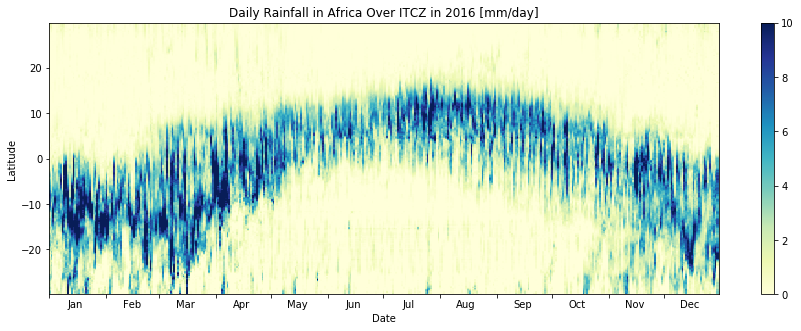

In [6]:
fig, ax = plt.subplots(1, 1 , figsize=(15,5))
im = ax.pcolormesh(daysx, latsx, itczpr_zm.T, cmap='YlGnBu', vmin=0.0, vmax=10)
fig.colorbar(im)

plt.title('Daily Rainfall in Africa Over ITCZ in 2016 [mm/day]', fontsize=12)
plt.ylabel('Latitude')
plt.xlabel('Date')

# make labels centered
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(DateFormatter('%b'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')


In the Hovmöller Diagram, you can still see that the heaviest rains push farthest up (north) along the Y-axis in the northern hemisphere summer (June-August). In contrast, during the southern hemisphere summer (December-February), the opposite occurs. Rains are farther down (south) along the Y-axis. The seasonal cycle of African rainfall is simplified in one tidy figure!

While they may pale in comparison to the type of sorcery seen in Harry Potter, Hovmöller Diagrams are excellent at tracking signals that move, like rains in Africa. These diagrams can be used for many more types of atmospheric features.

## References

http://unidata.github.io/netcdf4-python/

Matplotlib: A 2D Graphics Environment by J. D. Hunter In Computing in Science & Engineering, Vol. 9, No. 3. (2007), pp. 90-95

Jones E, Oliphant E, Peterson P, et al. SciPy: Open Source Scientific Tools for Python, 2001-, http://www.scipy.org/ [Online; accessed 2017-09-11]

Hovmöller, E. (1949), The Trough-and-Ridge diagram. Tellus, 1: 62–66.

Funk, C. C, Peterson, P. J., Landsfeld, M. F., Pedreros, D. H., Verdin, J. P., Rowland, J. D., Romero, B. E., Husak, G. J. Michaelsen, J. C., and Verdin, A. P., 2014, A quasi-global precipitation time series for drought monitoring: U. S. Geological Survey Data Series 832, 4 p., http://dx.doi.org/110.3133/ds832.